<b style='Color:red'> The python version used for running this notebook is 3.11.8 </b>

In [10]:
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np
from skimage.morphology import rectangle
from scipy.ndimage import median_filter
import cv2
from skimage import morphology,filters, util

In [6]:
# Please replace it with the correct file path on your computer
filePath = "C:/Users/user/Documents/BHE/BRUNNER/data_v1/"

# Local Mean Filtering with Morphological Operations

C:\Users\user\AppData\Local\Temp\ipykernel_8316\2487785398.py:14: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  footprint = morphology.rectangle(40, 3)


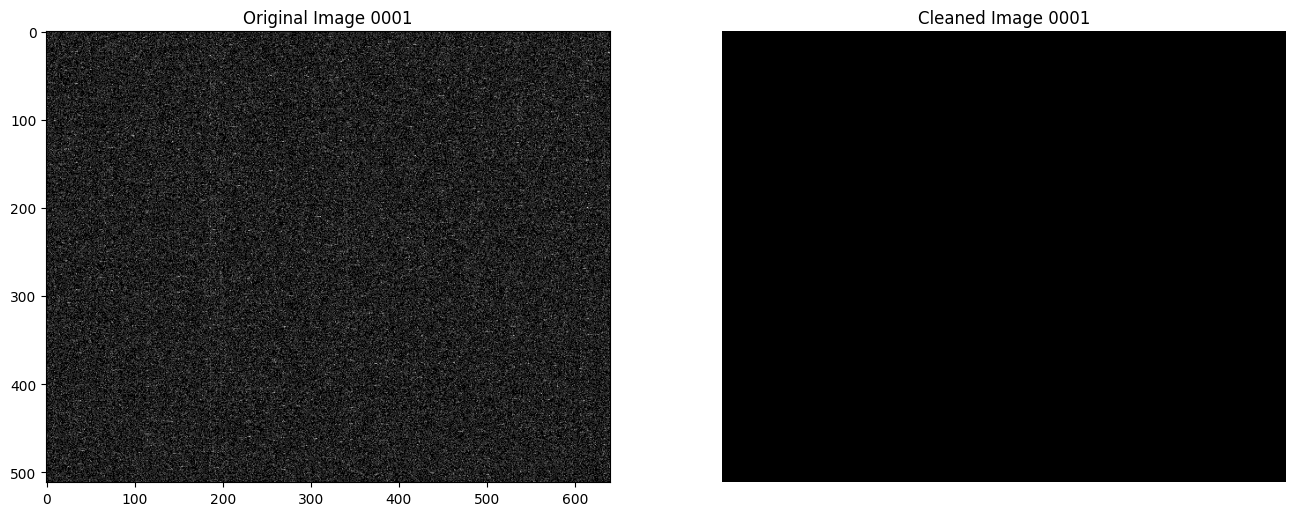

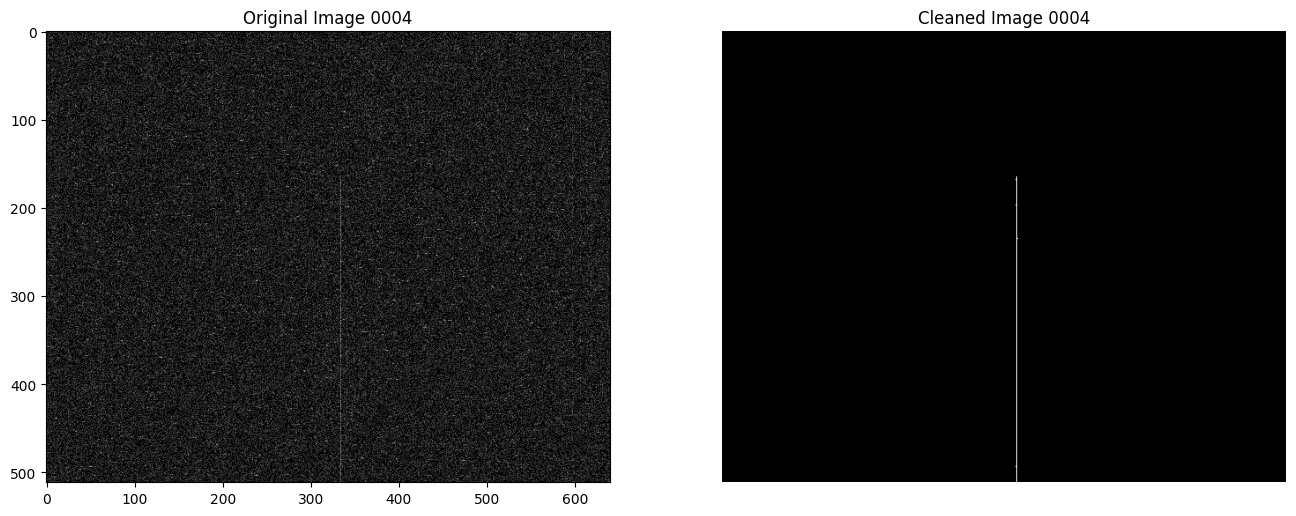

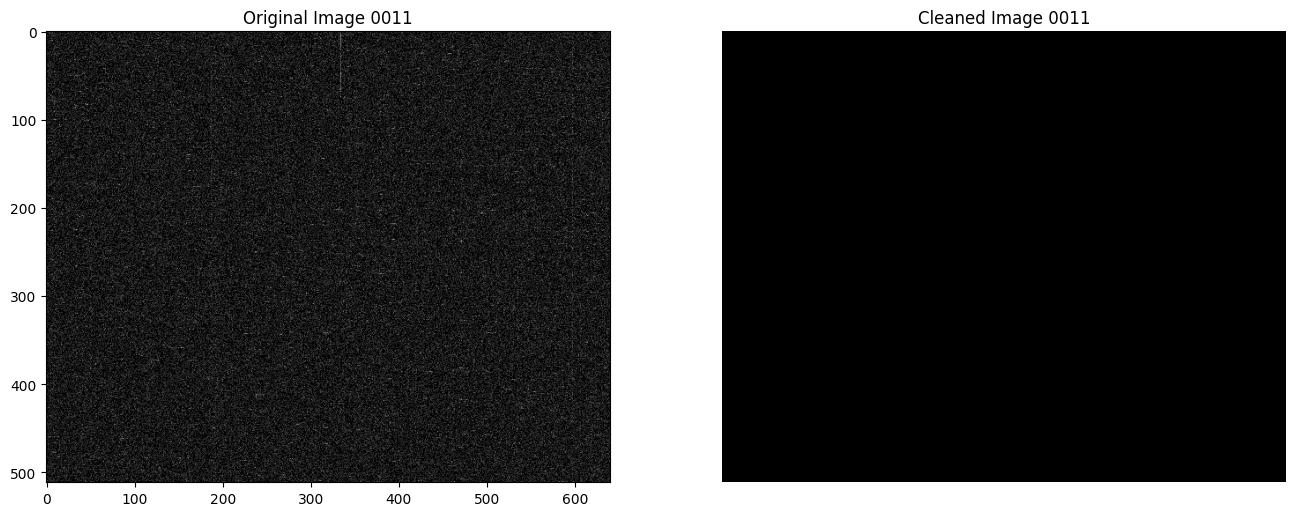

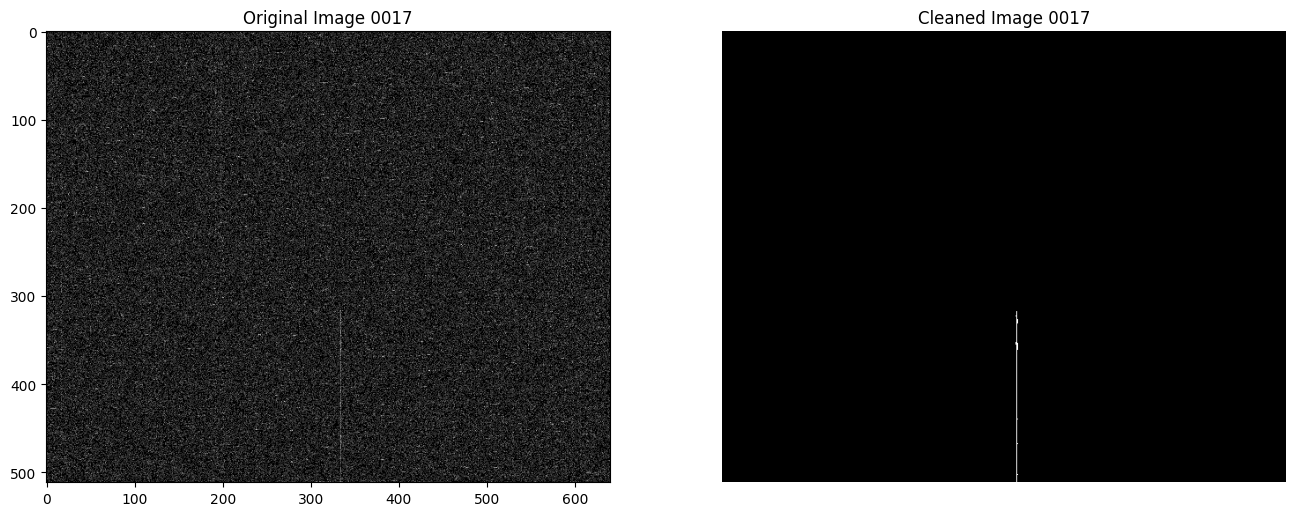

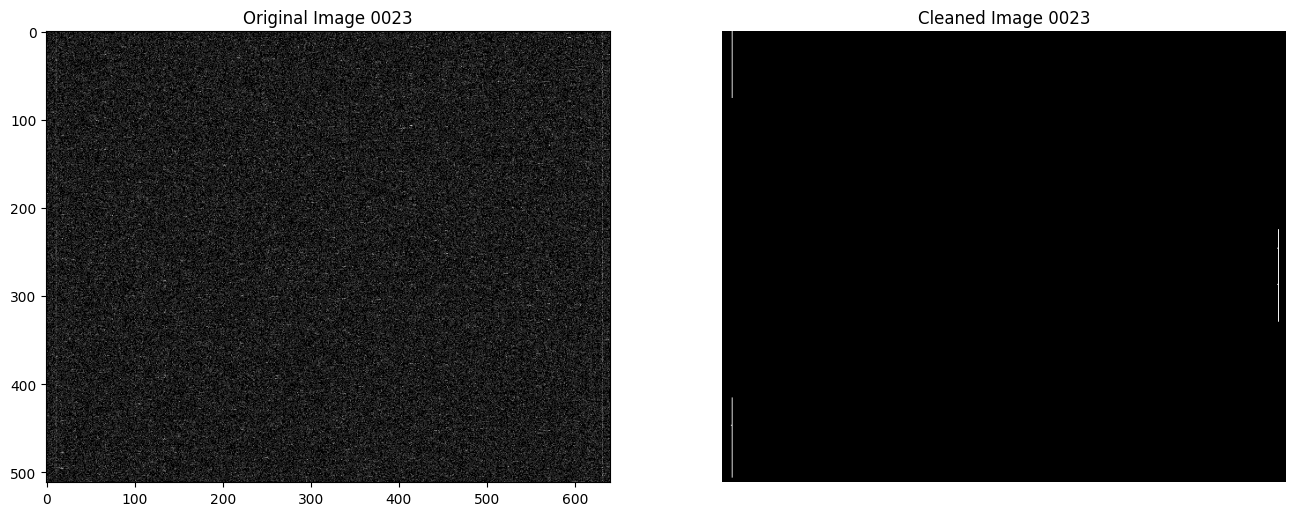

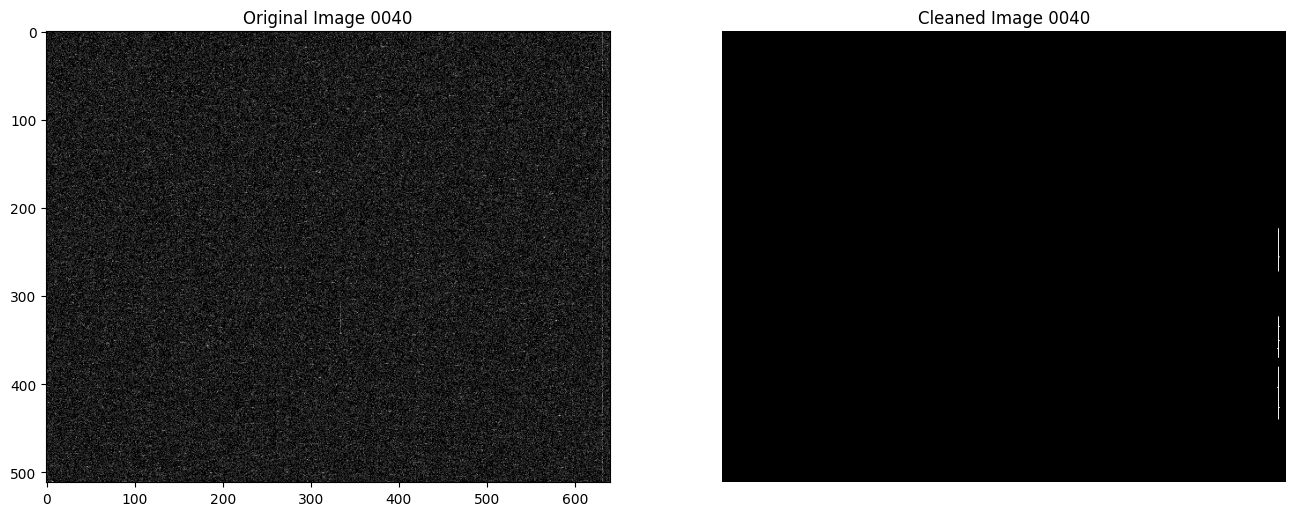

In [ ]:
file = h5.File("{}REF_N5.h5".format(filePath), 'r')
testImages = ['Image 0001','Image 0004','Image 0011','Image 0017','Image 0023','Image 0040']
# if you want to test all images, uncomment the line below
# testImages = file.keys()

for k in testImages:
    imagename = k
    image1 = file[imagename]
    image1 = file[imagename][:image1.shape[1]]

    image_uint8 = util.img_as_ubyte(image1 / np.max(image1))  # Normalized to 0–255

    # Apply rank mean bilateral filter
    footprint = morphology.rectangle(40, 3)
    filtered = filters.rank.mean_bilateral(image_uint8, footprint, s0=10, s1=10)


    # Apply thresholding
    _, thresholded = cv2.threshold(filtered, 100, 255, cv2.THRESH_BINARY)  # Lower threshold if line is dimmed

    # Morphological Operations
    kernel = np.ones((10, 1), np.uint8)  # Vertical structure
    dilated = cv2.dilate(thresholded, kernel, iterations=1)
    kernel = np.ones((10, 1), np.uint8)
    dilated = cv2.erode(dilated,kernel)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated, connectivity=4)

    
    min_area = 50 # Minimum area threshold

    # Create output mask
    output = np.zeros_like(dilated)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= min_area:
            output[labels == i] = 255  # Keep only large components
            
    # Display
    _,ax=plt.subplots(1,2,figsize=(16,9))
    ax[0].set_title("Original {}".format(k))
    ax[1].set_title("Cleaned {}".format(k))
    ax[0].imshow(image_uint8,cmap='gray')
    ax[1].imshow(output, cmap='gray')
    plt.axis('off')
    plt.show()


# Median Filter with Morpholigical Operations

C:\Users\user\AppData\Local\Temp\ipykernel_8316\1143745820.py:22: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  dilated = morphology.closing(thresholded,rectangle(10,1))


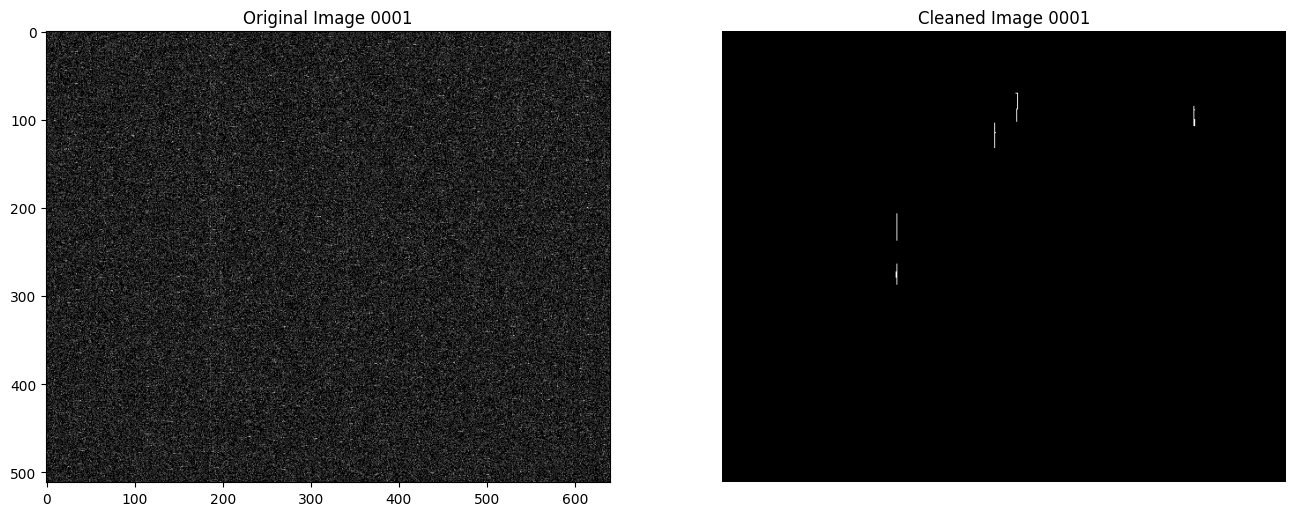

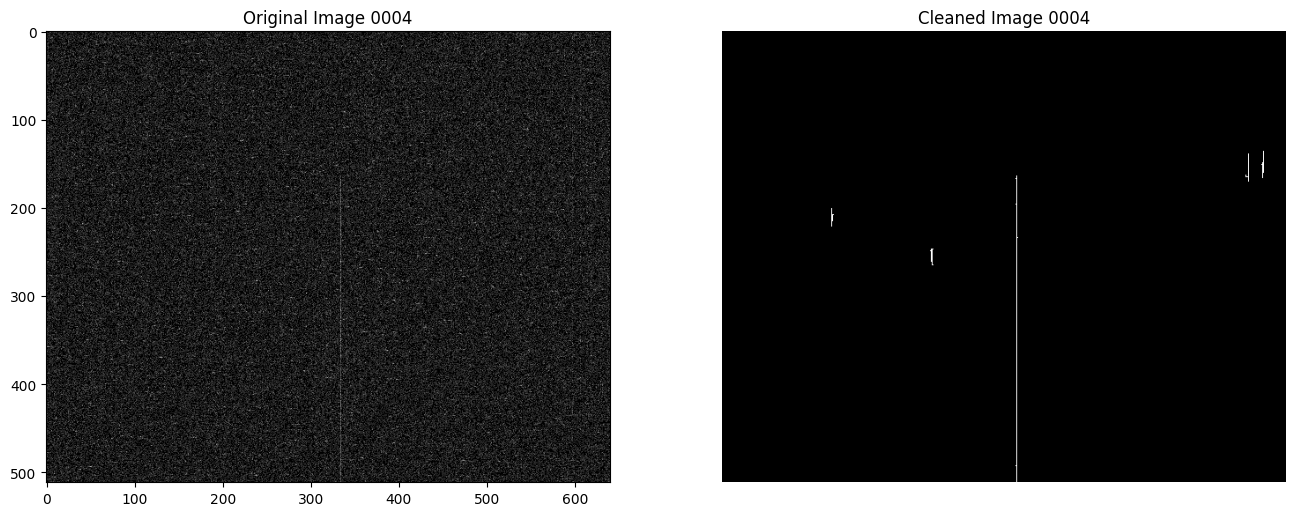

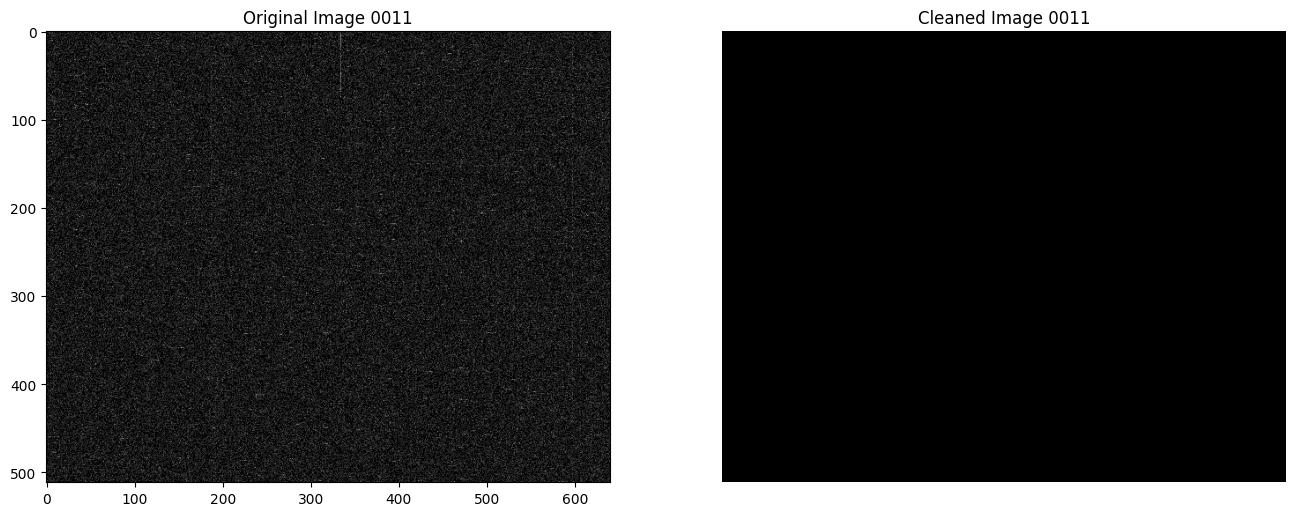

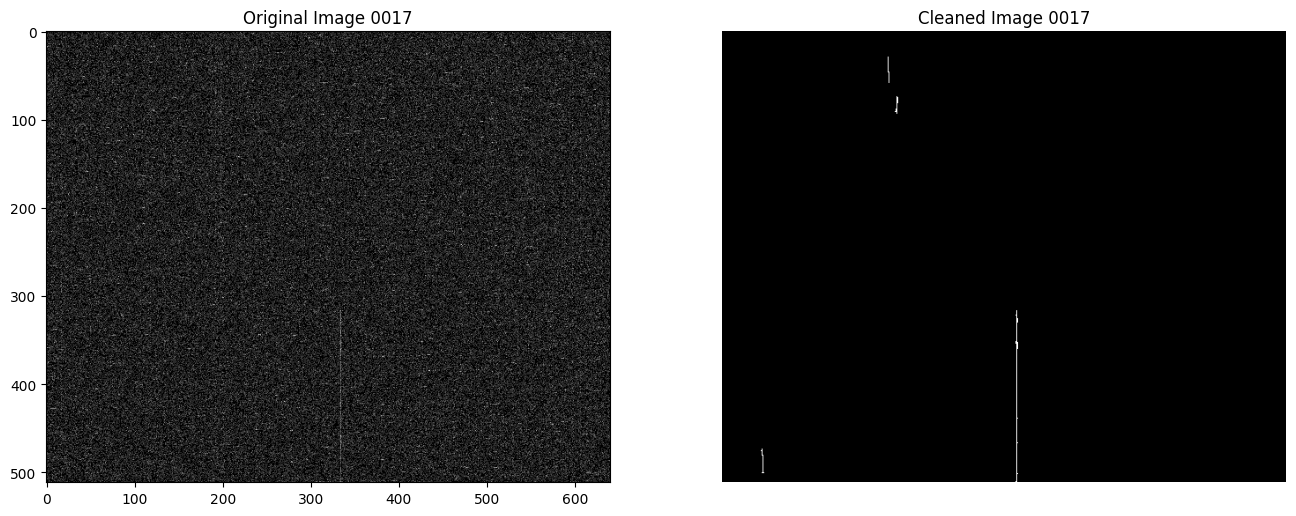

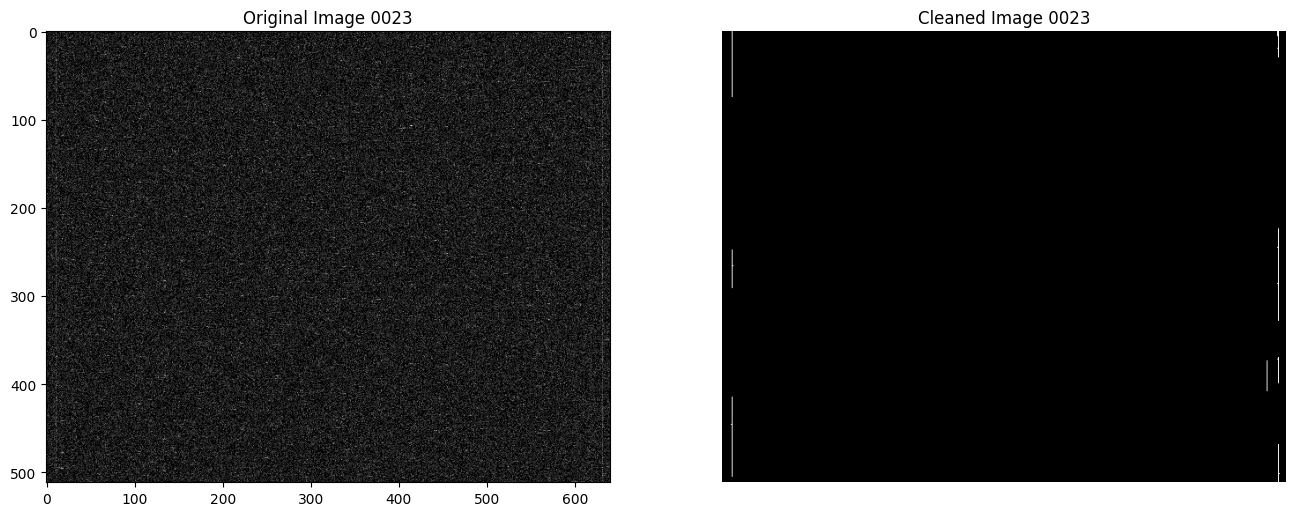

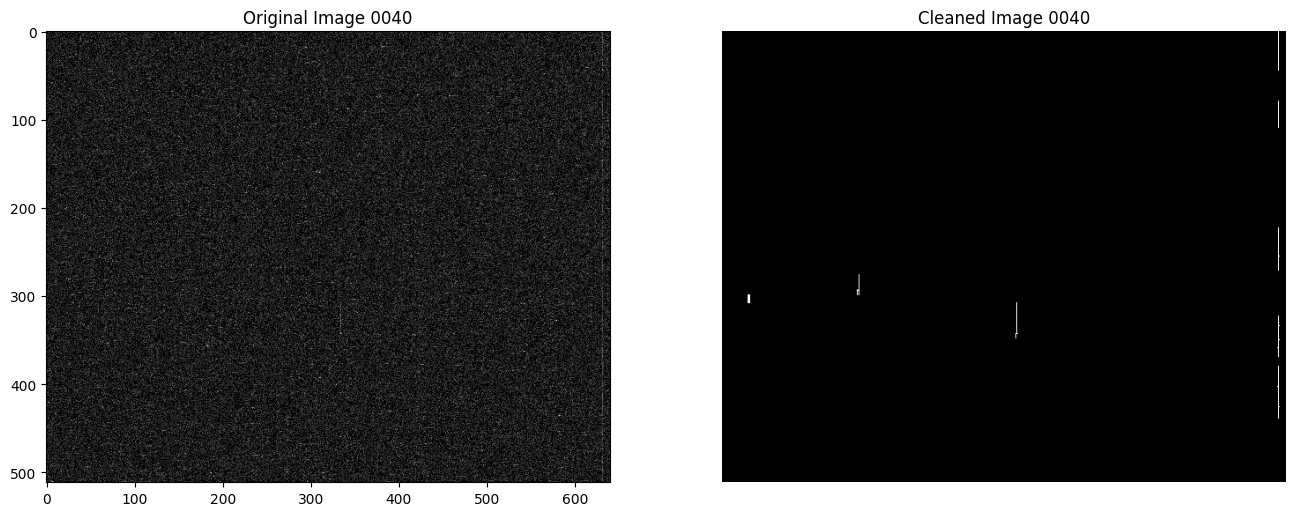

In [14]:
file = h5.File("{}REF_N5.h5".format(filePath), 'r')
testImages = ['Image 0001','Image 0004','Image 0011','Image 0017','Image 0023','Image 0040']
# if you want to test all images, uncomment the line below
# testImages = file.keys()

for k in testImages:
    imagename = k
    image1 = file[imagename][:]
    
    image_norm = image1 / np.max(image1)
    image_uint8 = util.img_as_ubyte(image_norm)  # Normalized to 0–255

    # Apply median filter
    filtered = median_filter(image_uint8, size=1)

    # Apply thresholding
    _, thresholded = cv2.threshold(filtered, 100, 255, cv2.THRESH_BINARY)

    # Apply morpholigical operations
    kernel = np.ones((10, 1), np.uint8)  # vertical kernel
    dilated = cv2.dilate(thresholded, kernel, iterations=1)
    dilated = morphology.closing(thresholded,rectangle(10,1))
    
    # Connected component filtering
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated, connectivity=8)
    min_area = 30
    output = np.zeros_like(dilated)

    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_area:
            output[labels == i] = 255

    # Display
    _,ax=plt.subplots(1,2,figsize=(16,9))
    ax[0].set_title("Original {}".format(k))
    ax[1].set_title("Cleaned {}".format(k))
    ax[0].imshow(image_uint8,cmap='gray')
    ax[1].imshow(output, cmap='gray')
    plt.axis('off')
    plt.show()